In [34]:
# this script is used to Build a word cloud of most used words and phrases by ChatGPT along with some cool visualizations

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_excel('data/ieee-chatgpt-generation.xlsx')
df.to_csv('data/data.csv', index=False)

In [37]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,title,keyword,abstract
0,0,0,8600003,An Improved Variable-Node-Based BP Decoding Al...,"""Flash memories"",""Reliability"",""Decoding"",""Par...",The reliability of flash memories is highly de...
1,1,1,8600004,Mobile Robot Location Algorithm Based on Impro...,"""Sociology"",""Statistics"",""Simultaneous localiz...",This paper proposes an improved particle filte...
2,2,2,8600008,Vertical Handoff Decision Algorithm for Hetero...,"""Entropy"",""Handover"",""Wireless networks"",""Deci...",This paper proposes a novel algorithm for vert...
3,3,3,8600013,Robust offline trained neural network for TDOA...,"""Microphones"",""Artificial neural networks"",""Po...",This paper proposes a robust offline trained n...
4,4,4,8600014,Gaussian MAC with Feedback and Strictly Causal...,"""Encoding"",""Transmitters"",""Decoding"",""Indexes""...",This paper proposes a method for encoding and ...


In [38]:
# keep id, title, keyword and abstract columns. Drop the rest
df = df[['title', 'keyword', 'abstract']]
df.head()

,title,keyword,abstract
0,An Improved Variable-Node-Based BP Decoding Al...,"""Flash memories"",""Reliability"",""Decoding"",""Par...",The reliability of flash memories is highly de...
1,Mobile Robot Location Algorithm Based on Impro...,"""Sociology"",""Statistics"",""Simultaneous localiz...",This paper proposes an improved particle filte...
2,Vertical Handoff Decision Algorithm for Hetero...,"""Entropy"",""Handover"",""Wireless networks"",""Deci...",This paper proposes a novel algorithm for vert...
3,Robust offline trained neural network for TDOA...,"""Microphones"",""Artificial neural networks"",""Po...",This paper proposes a robust offline trained n...
4,Gaussian MAC with Feedback and Strictly Causal...,"""Encoding"",""Transmitters"",""Decoding"",""Indexes""...",This paper proposes a method for encoding and ...


In [39]:
# check for null values
df.isnull().sum()

title       0
keyword     0
abstract    0
dtype: int64

In [43]:
# get the keywords
keywords = [kw.strip('"') for row in df['keyword'] for kw in row.split(',')]
print("Length: ", len(keywords))
print(keywords[:5])

Length:  101159
['Flash memories', 'Reliability', 'Decoding', 'Parity check codes', 'Convergence']


In [48]:
# convert to lowercase and store only unique keywords
keywords = list(set([kw.lower() for kw in keywords]))
print("Length: ", len(keywords))

print("Top 10 Keywords:")
for kw in keywords[:10]: print(kw)

Length:  3484
Top 10 Keywords:
urban areas
uplink
set theory
solar panels
authoring systems
formal verification
minerals
mesh generation
rescue robots
loaded antennas


In [50]:
# store all the abstracts in a single string
text = ' '.join([str(abs) for abs in df['abstract']])

In [52]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

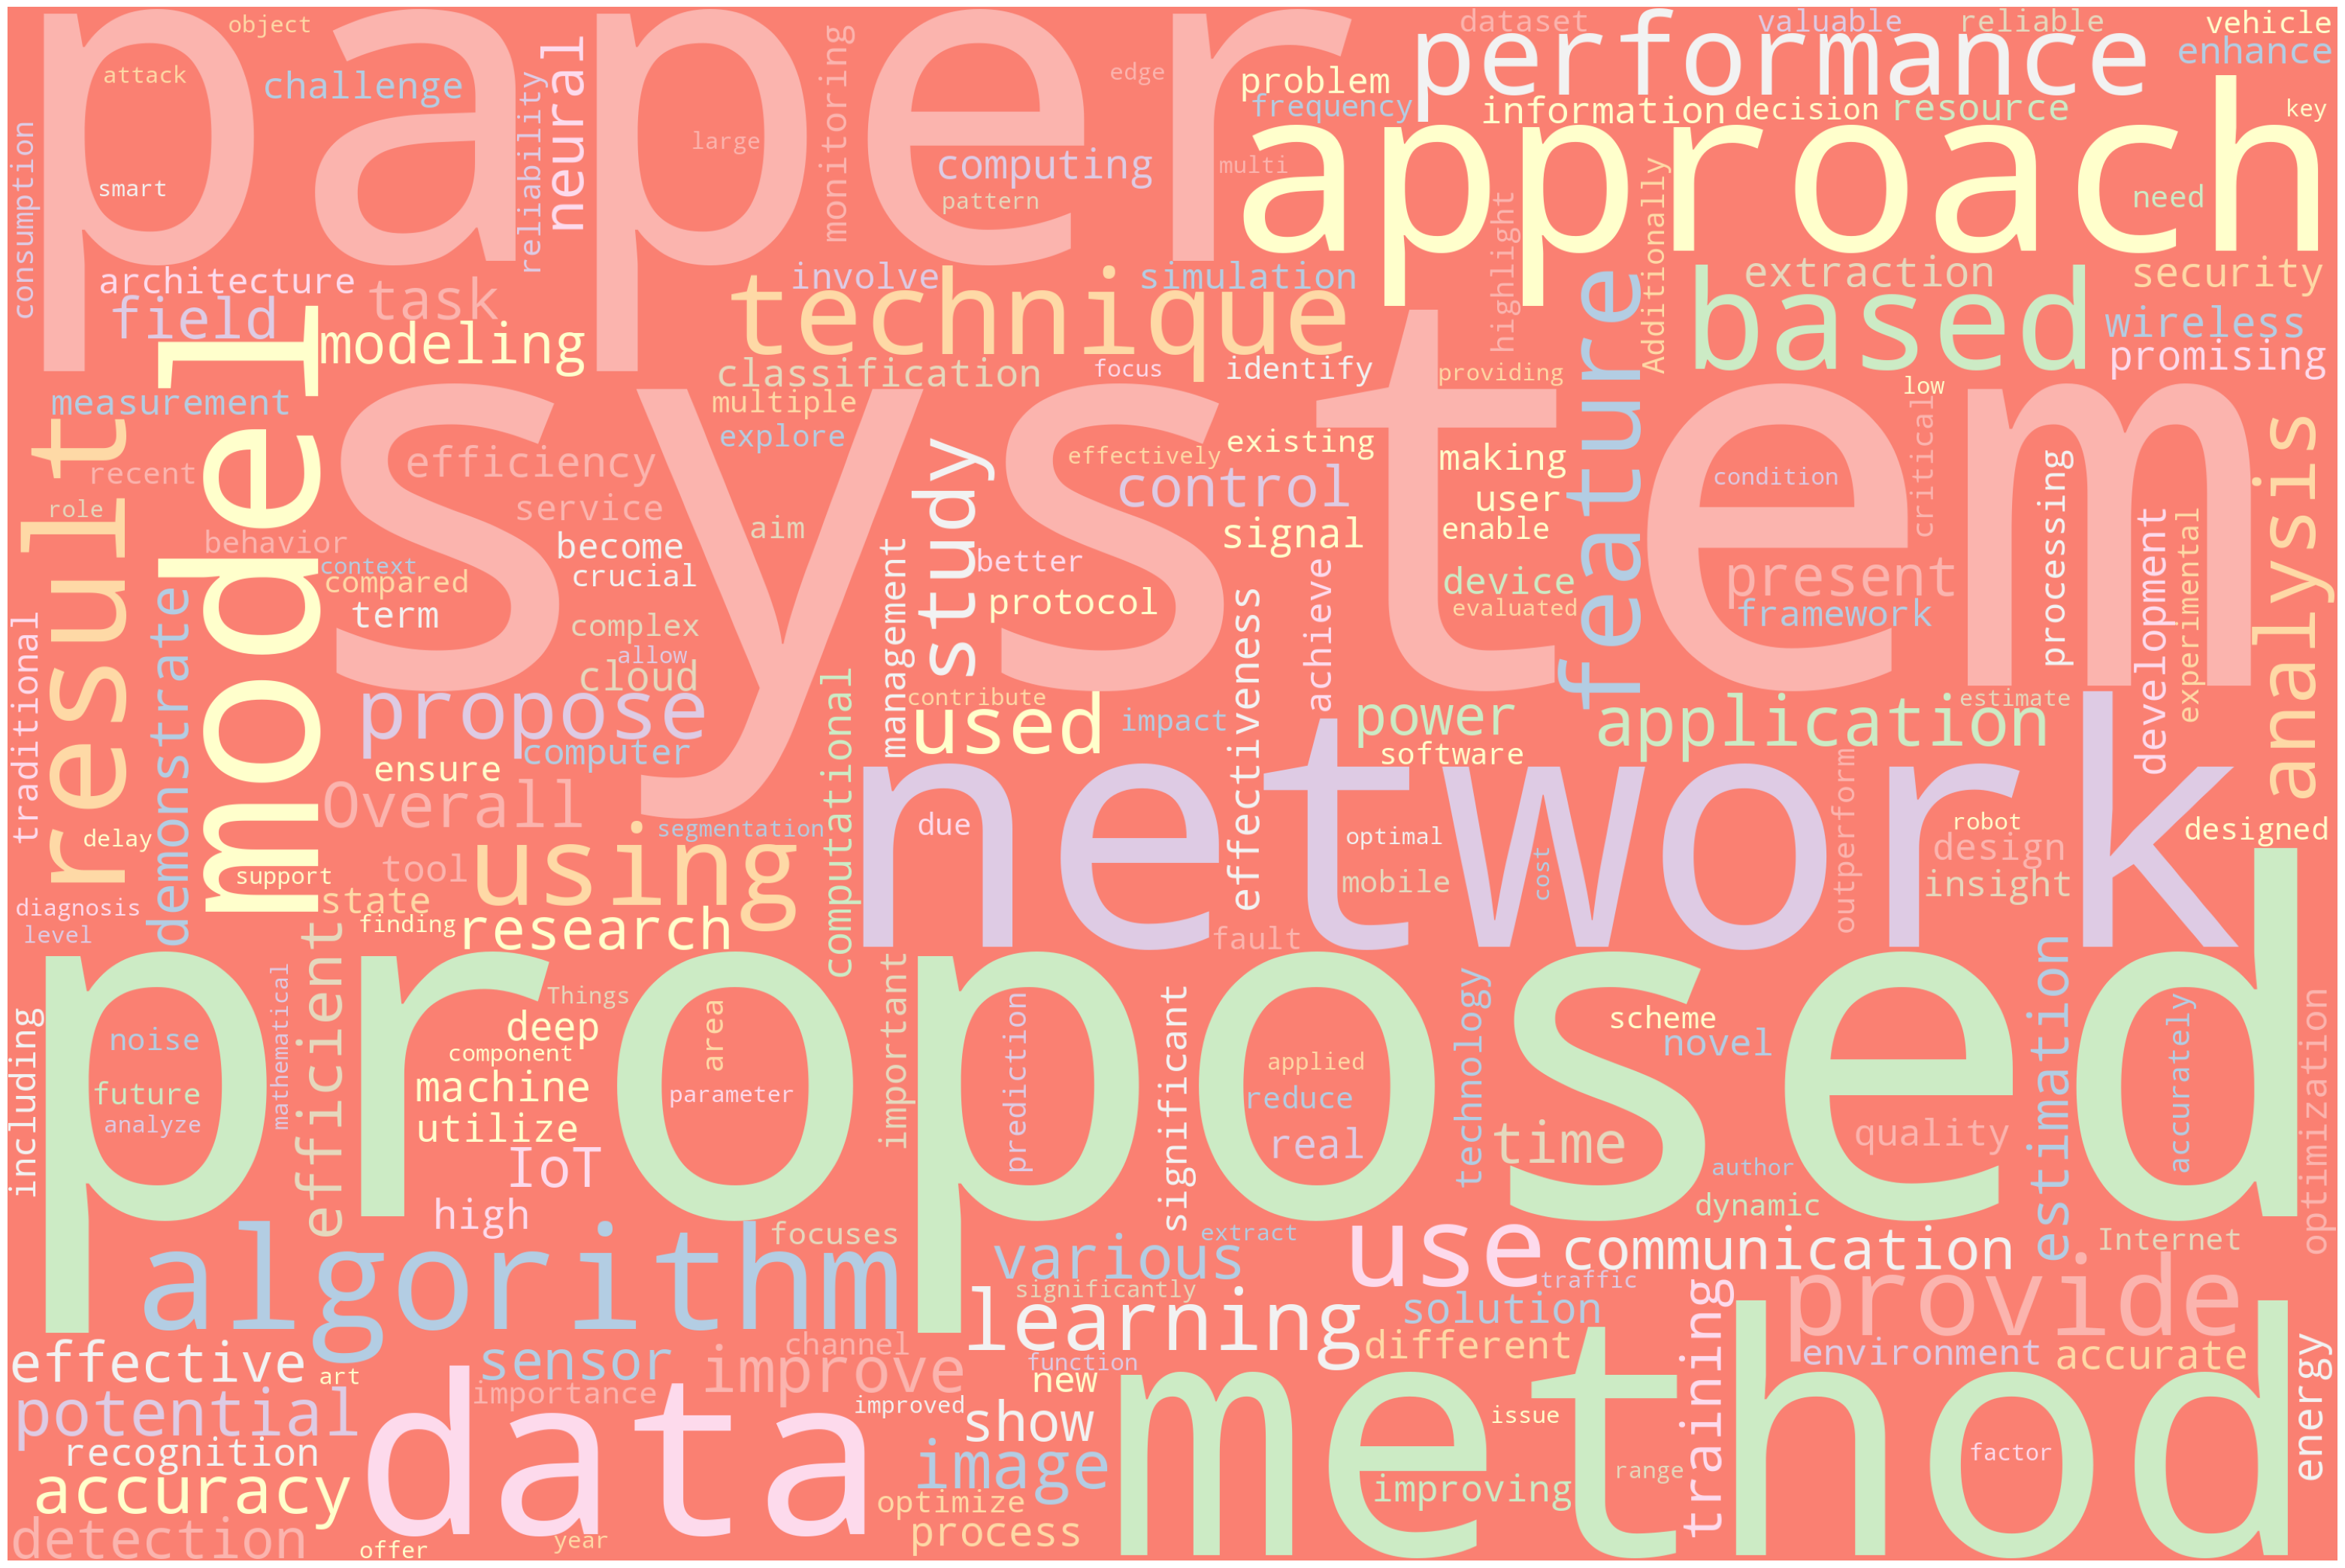

In [54]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=10, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

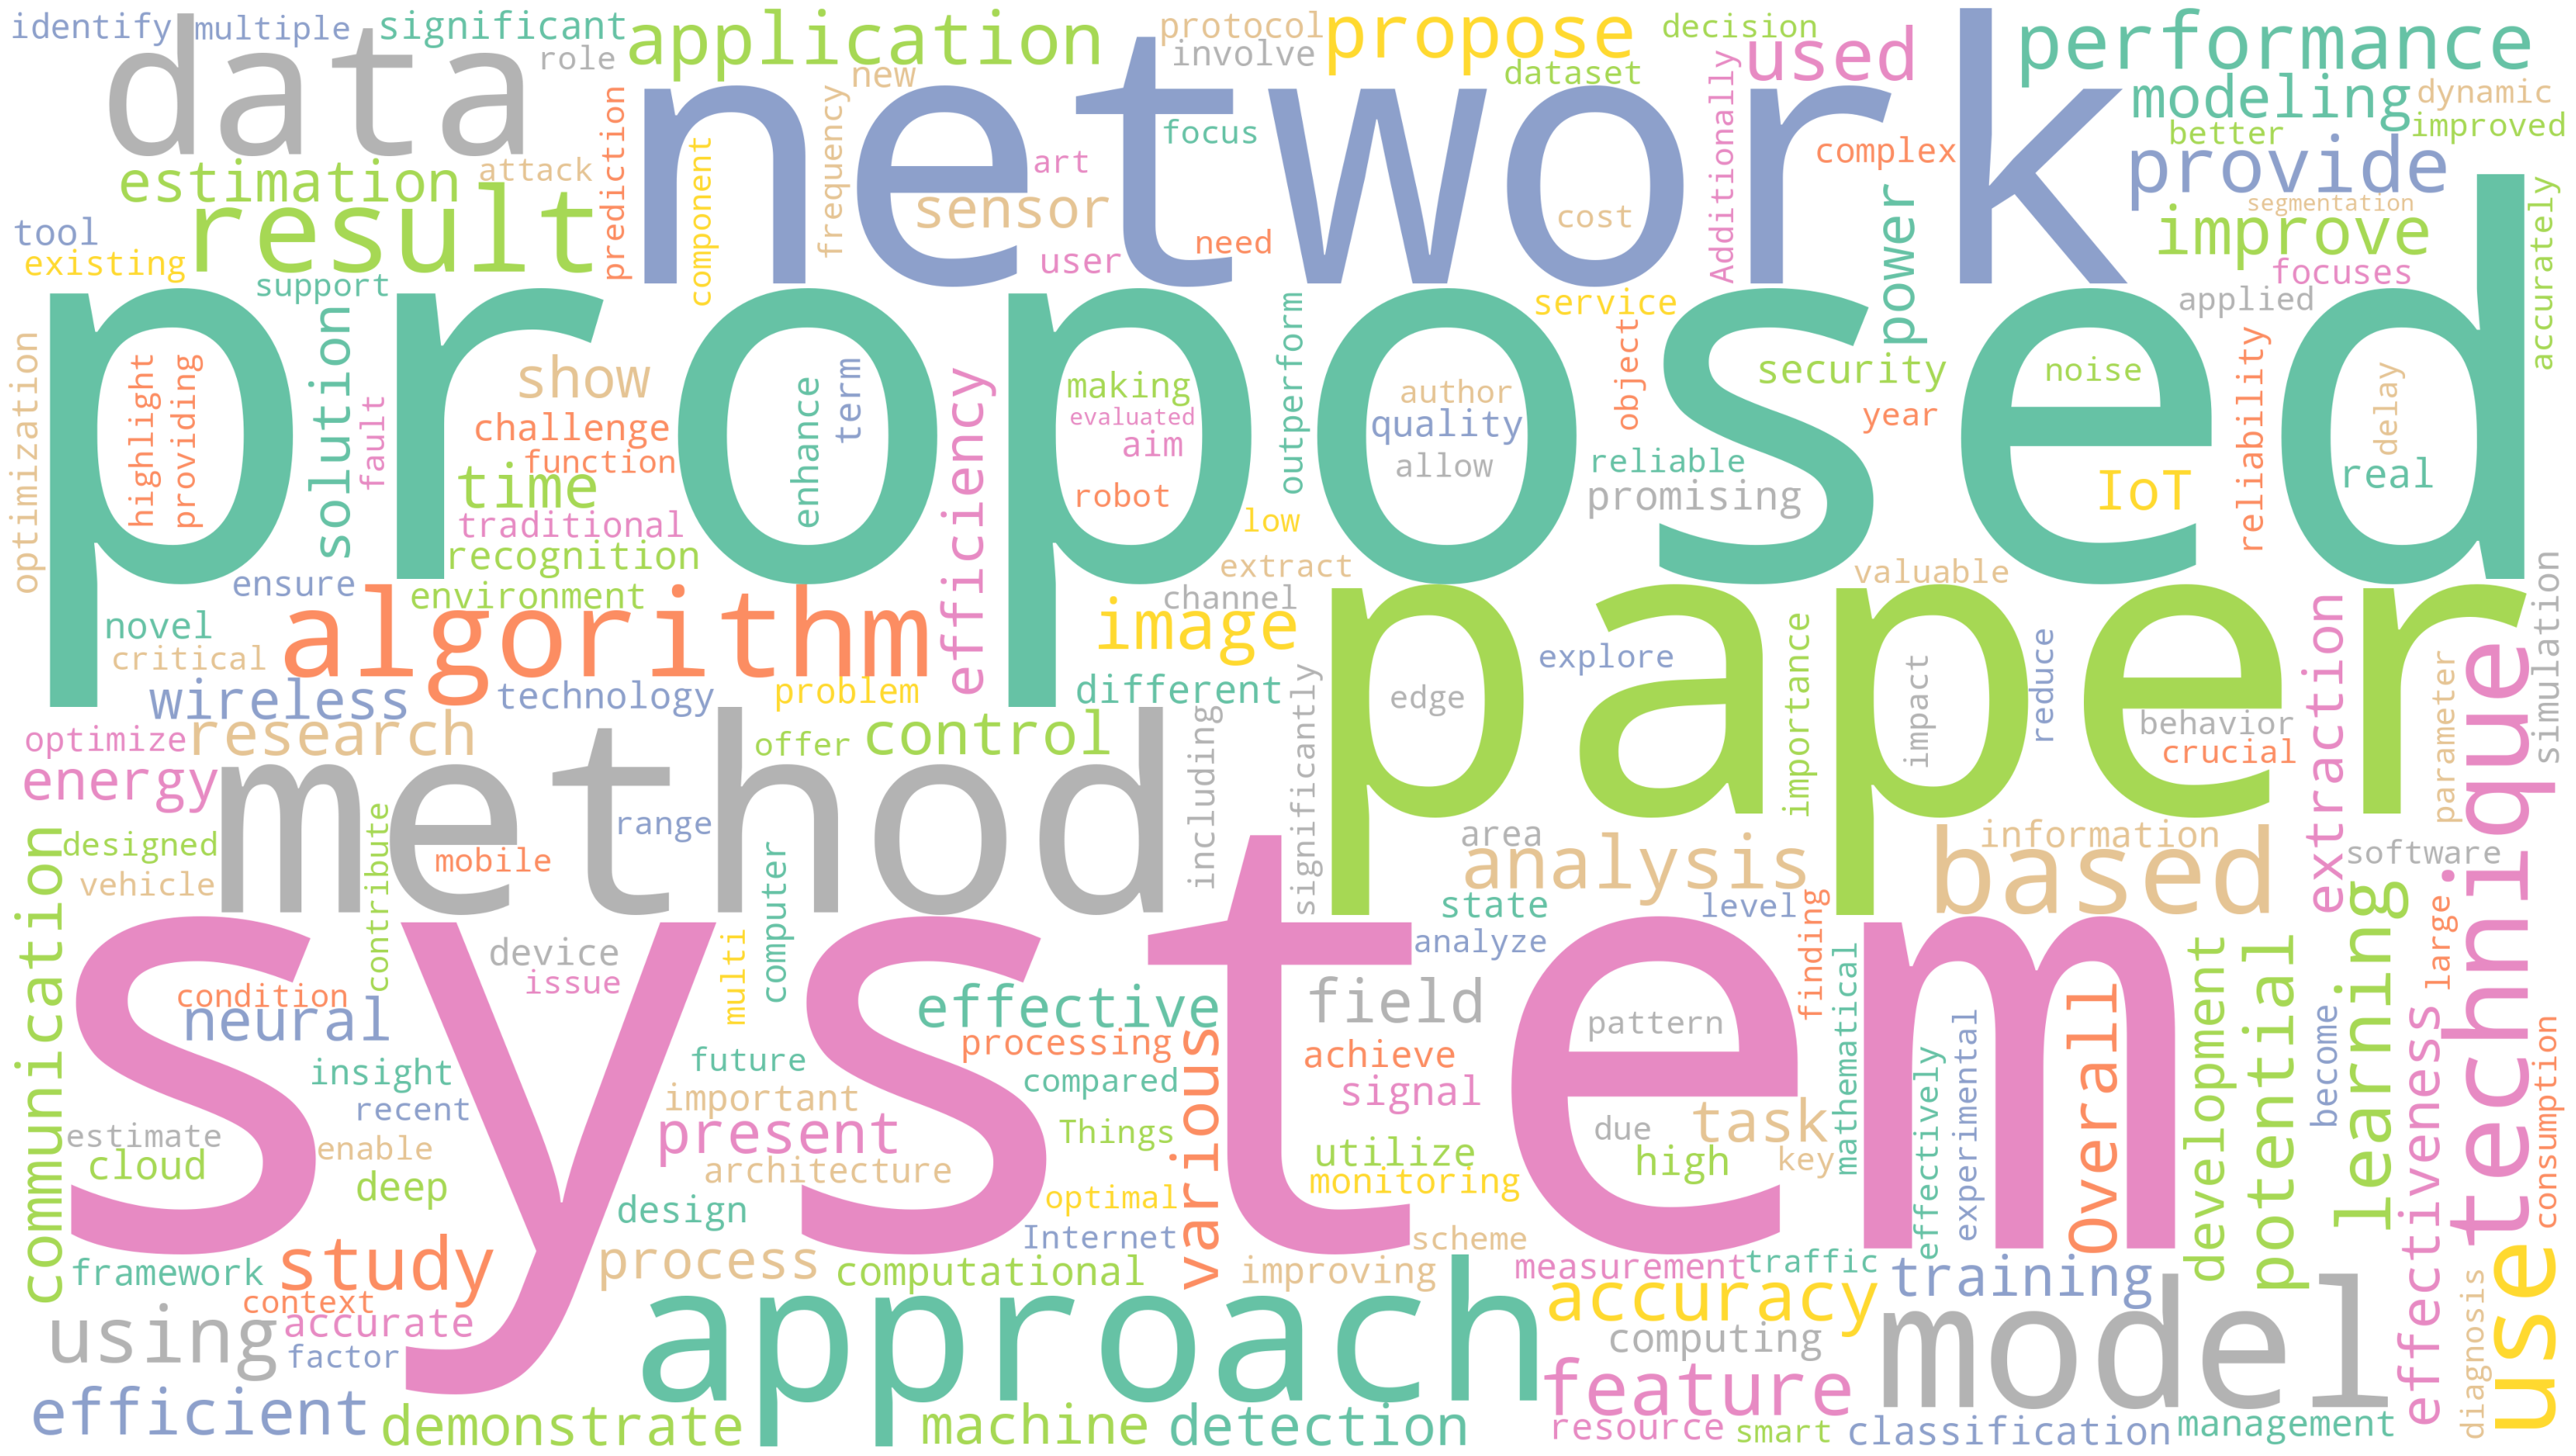

In [56]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('ChatGPT-Logo.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)